In [1]:
import re #正则模块
import numpy as np #科学计算
import pandas as pd #数据分析
import matplotlib.pyplot as plt #画图
import seaborn as sns #更简单的画图

import warnings
warnings.filterwarnings('ignore')#忽略警告

%matplotlib inline 
#应该是不需要写plt.show()了，但还是要写，所以不知道这句什么意思

In [2]:
train_data = pd.read_csv('/Users/hujing/DA/titanic/train.csv') #载入训练数据
test_data = pd.read_csv('/Users/hujing/DA/titanic/test.csv') #载入测试数据

sns.set_style = ('whitegrid') #选择sns的主题
#train_data.head()
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_data.info()
print('-' * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

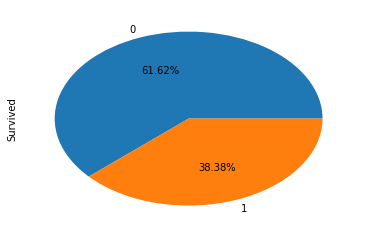

In [4]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%') #绘制饼图

In [5]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values #用众数填补空值 

In [6]:
train_data['Cabin'] = train_data.Cabin.fillna('U0') #用‘U0’填补缺失船舱

In [7]:
train_data[(train_data.Survived == 1)&(train_data.Age >= 50)].Survived.count()/train_data[(train_data.Age >= 50)].Survived.count()
#可见年龄在50岁以上的乘客幸存率要低于青壮年乘客

0.36486486486486486

In [8]:
train_data[(train_data.Survived == 1)&(train_data.Age >= 60)].Survived.count()/train_data[(train_data.Age >= 60)].Survived.count()
#60岁以上老人存活较低，估计只有1-2人存活

0.2692307692307692

In [9]:
train_data[(train_data.Survived == 1)&(train_data.Age >= 20)&(train_data.Age < 50)].Survived.count()/train_data[(train_data.Age >= 20)&(train_data.Age < 50)].Survived.count()
#青壮年乘客的存活率高于平均

0.3865546218487395

In [10]:
train_data[(train_data.Survived == 1)&(train_data.Age < 20)&(train_data.Age >= 10)].Survived.count()/train_data[(train_data.Age < 20)&(train_data.Age >= 10)].Survived.count()
#青少年的存活率明显高于平均

0.4019607843137255

In [11]:
train_data[(train_data.Survived == 1)&(train_data.Age < 10)].Survived.count()/train_data[train_data.Age < 10].Survived.count()
#儿童的存活率最高，远高于平均

0.6129032258064516

In [12]:
train_data[train_data.Survived == 1].Survived.count()/train_data.Survived.count() #总体存活率

0.3838383838383838

In [13]:
from sklearn.ensemble import RandomForestRegressor  #利用随机森林回归 来填补年龄空缺
#choose training data to predict age
age_df = train_data[['Age','Survived','Fare','Parch','SibSp','Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:] #取'Survived','Fare','Parch','SibSp','Pclass'为训练数据
Y = age_df_notnull.values[:,0] #取年龄
#use RandomForestRegressor to train data
RFR = RandomForestRegressor(n_estimators = 1000, n_jobs = -1)  #训练1000次
RFR.fit(X, Y) 
predictAges = RFR.predict(age_df_isnull.values[:,1:]) 
train_data.loc[train_data['Age'].isnull(),['Age']] = predictAges

In [16]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

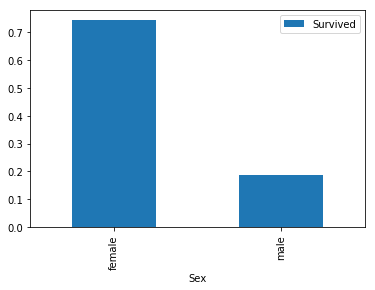

In [17]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar() #性别与存活率

In [18]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [21]:
train_data.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   80     80     80      80    80   
       1                 136   136  136  136    136    136     136   136   
2      0                  97    97   97   97     97     97      97    97   
       1                  87    87   87   87     87     87      87    87   
3      0                 372   372  372  372    372    372     372   372   
       1                 119   119  119  119    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            80        80  
       1           136       136  
2      0            97        97  
       1            87        87  
3      0           372       372  
       1           119       119

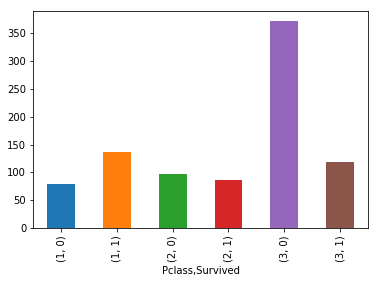

In [22]:
train_data.groupby(['Pclass','Survived'])['Survived'].count().plot.bar() #仓位与存活率

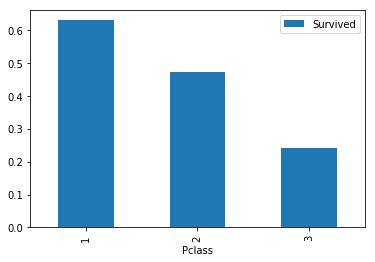

In [23]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar() #平均数在此也是百分率

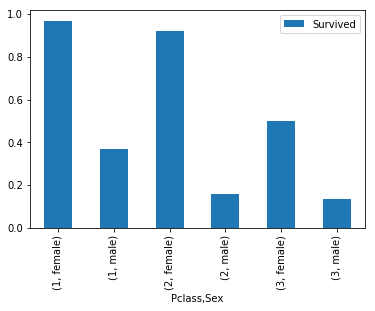

In [24]:
train_data[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean().plot.bar() #仓位、性别与存活率

In [25]:
train_data[['Age']].describe()

,Age
count,891.000000
mean,29.664507
std,13.736539
min,0.420000
25%,21.000000
50%,28.000000
75%,37.000000
max,80.000000


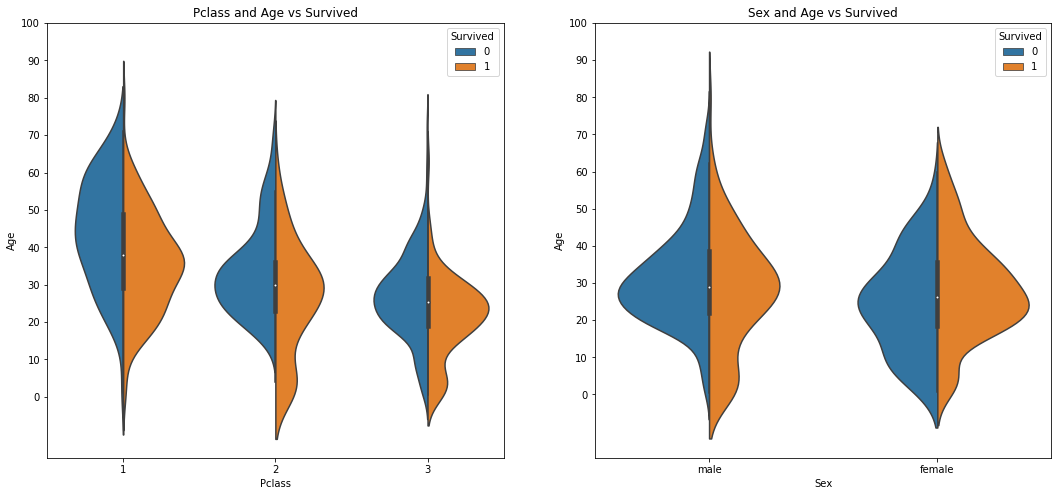

In [26]:
fig, ax = plt.subplots(1,2,figsize = (18,8)) #画布布置方法1
sns.violinplot("Pclass","Age",hue = 'Survived',data = train_data,split = True, ax =ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue = 'Survived',data = train_data,split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
                 
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(122)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

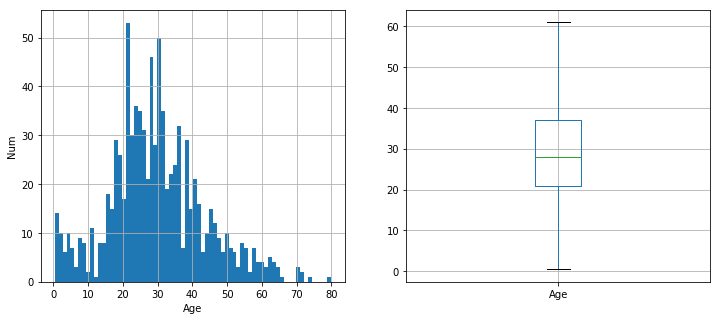

In [27]:
plt.figure(figsize = (12,5))  #画布布置方法2
plt.subplot(121) 
train_data['Age'].hist(bins=70) 
plt.xlabel('Age') 
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column = 'Age',showfliers = False)

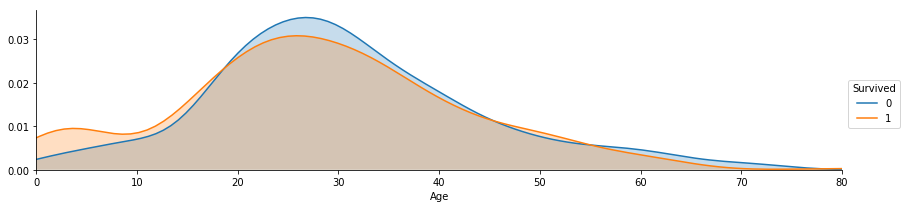

In [28]:
facet = sns.FacetGrid(train_data,hue = "Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()

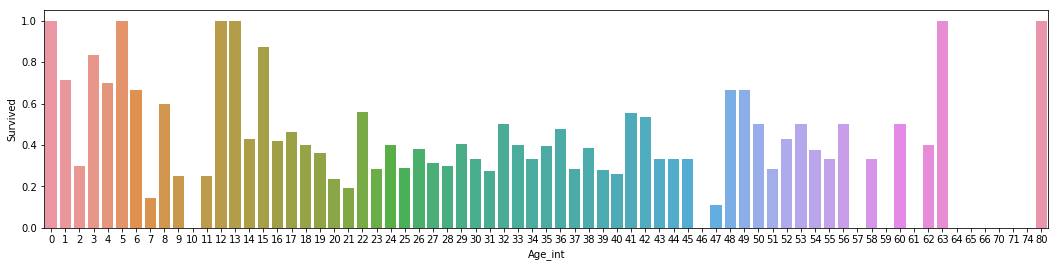

In [30]:
#average survived passengers by age
fig,axis1 = plt.subplots(1,1,figsize = (18,4))
train_data["Age_int"] = train_data["Age"].astype(int)
average_age = train_data[["Age_int","Survived"]].groupby(['Age_int'],as_index = False).mean()
sns.barplot(x = 'Age_int',y = 'Survived',data = average_age)

In [32]:
bins = [0,12,18,65,100]
train_data['Age_group'] = pd.cut(train_data['Age'],bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

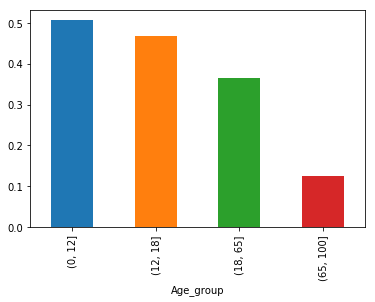

In [33]:
by_age.plot(kind = 'bar')

In [34]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.',expand = False)
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


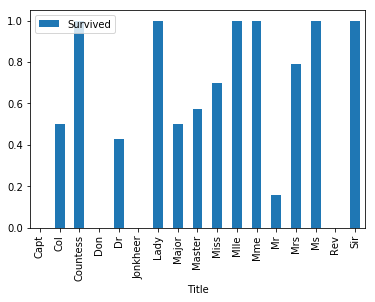

In [35]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

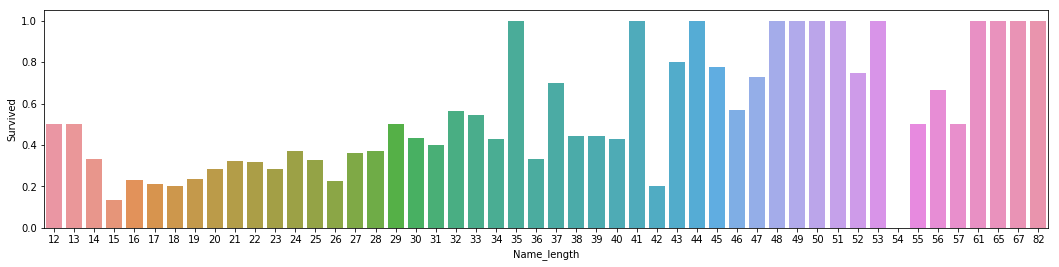

In [36]:
fig.axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x = 'Name_length',y = 'Survived',data = name_length)

In [37]:
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

Text(0.5,0,'no_sibsp')

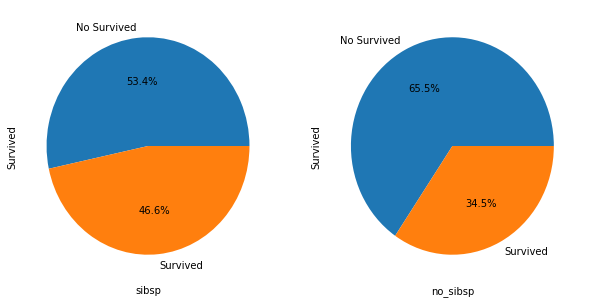

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels = ['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('sibsp')
plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels = ['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('no_sibsp')


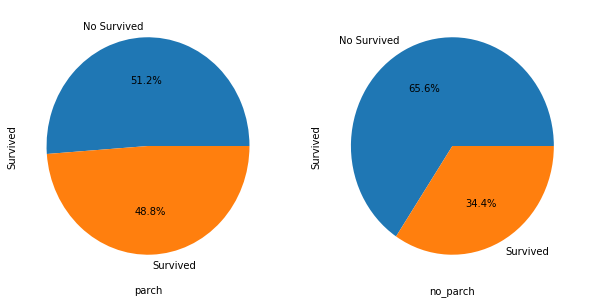

In [39]:
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize = (10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels = ['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('parch')
plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels = ['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

Text(0.5,1,'SibSp and Survived')

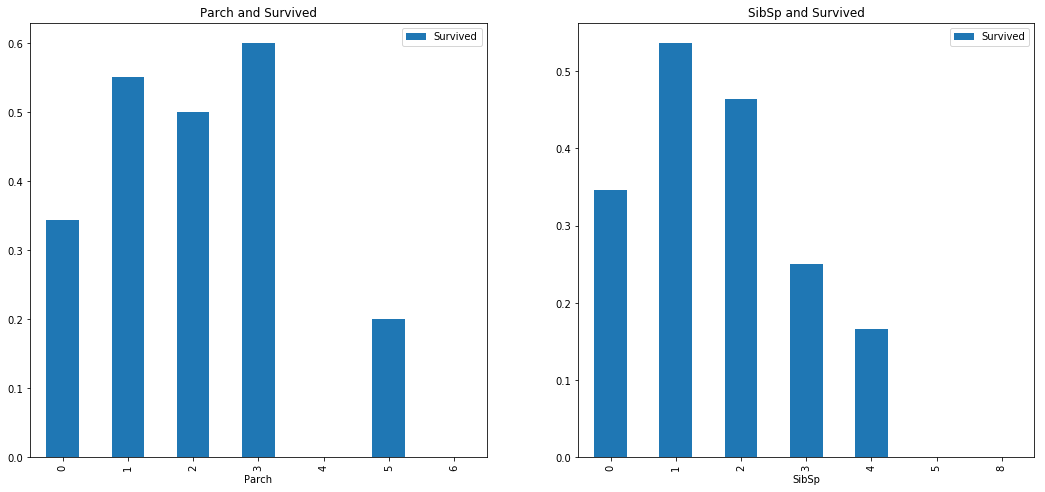

In [40]:
fix,ax = plt.subplots(1,2,figsize=(18,8))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax = ax[1])
ax[1].set_title('SibSp and Survived')

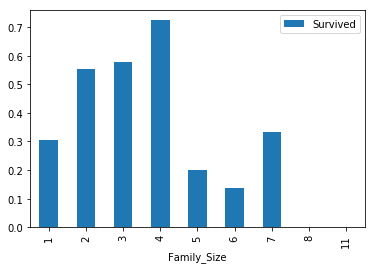

In [41]:
train_data['Family_Size'] = train_data['Parch']+train_data['SibSp']+1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

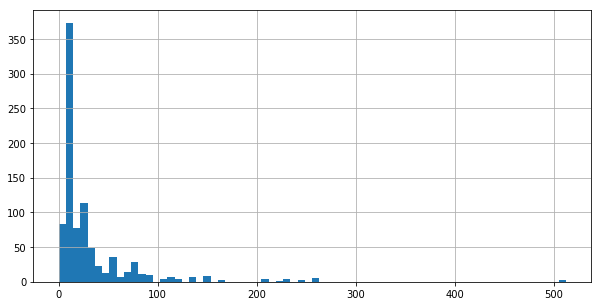

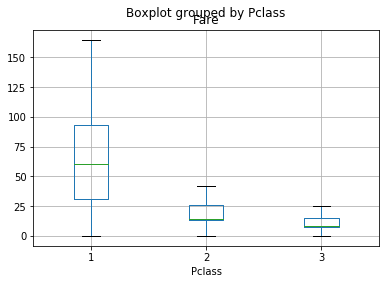

In [42]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins = 70)

train_data.boxplot(column='Fare', by='Pclass', showfliers=False)

In [43]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

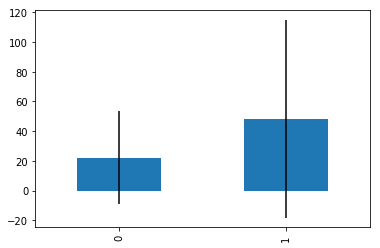

In [44]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] != 0]

average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr = std_fare,kind = 'bar',legend = False)

plt.show()

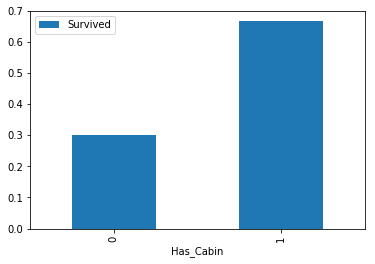

In [45]:
#Replace missing values with "U0"
train_data.loc[train_data.Cabin.isnull(), 'Cabin'] = 'U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

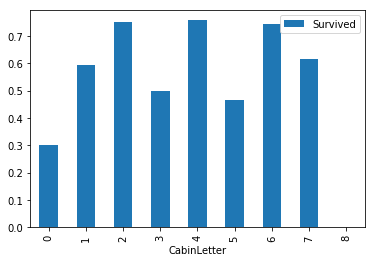

In [46]:
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) #re.compile待查
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()

Text(0.5,1,'Embarked and Survived')

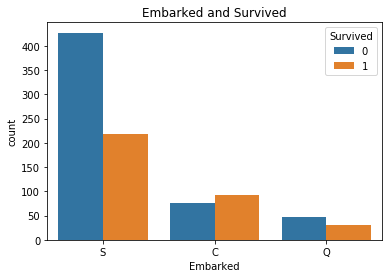

In [47]:
sns.countplot('Embarked',hue = 'Survived', data = train_data)
plt.title('Embarked and Survived')

Text(0.5,1,'Embarked and Survived rate')

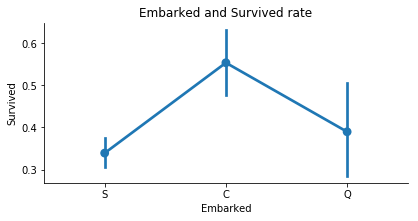

In [48]:
sns.factorplot('Embarked','Survived',data = train_data,size = 3,aspect = 2)
plt.title('Embarked and Survived rate')

In [49]:
#定性转换
#dummy variables
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'],axis = 1,inplace = True)

In [50]:
embark_dummies = train_data[['S','C','Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [51]:
train_data['Cabin'].describe()

count     891
unique    148
top        U0
freq      687
Name: Cabin, dtype: object

In [52]:
#factorizing
#create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#convert the distinct cabin letters with incremental integar values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data['CabinLetter'].head()

0    0
1    1
2    0
3    1
4    0
Name: CabinLetter, dtype: int64

In [53]:
#定量转换
#Scaling
from sklearn import preprocessing

assert np.size(train_data['Age']) == 891
#StandardScaler will subtract the mean from each value then scale to the unit variance
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))

In [54]:
train_data['Age_scaled'].head()

0   -0.558278
1    0.607153
2   -0.266921
3    0.388634
4    0.388634
Name: Age_scaled, dtype: float64

In [55]:
#Binning
#Divide all fares into quartiles
train_data['Fare_bin'] = pd.qcut(train_data['Fare'],5) #qcut待查
train_data['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [56]:
# qcut() creates a new variable that identifies the quartile range, but we can't use the string
# so either factorize or create dummies from the result

#factorize
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]

#dummies
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns = lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis = 1)

In [57]:
#特征工程
train_df_org = pd.read_csv('/Users/hujing/DA/titanic/train.csv')
test_df_org = pd.read_csv('/Users/hujing/DA/titanic/test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)
PassengerId = test_df_org['PassengerId']

In [58]:
#Embarked
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True) #用众数填充

#为了后面的特征分析，这里我们将Embarked 特征进行 factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]

#使用 pd.get_dummies 获取 one-hot 编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix = combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df],axis = 1)

In [59]:
#为了后面的特征分析，这里我们也将Sex 特征进行factorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

#使用 pd.get_dummies 获取 one-hot 编码
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix = combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df],axis = 1)

In [60]:
# what is each person's title?
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

In [61]:
# 将各种称呼归类
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle','Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

In [62]:
#为了后面的特征分析，这里我们将Title 特征进行 factorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]

title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix = combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df],axis = 1)

In [63]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

In [64]:
#Fare
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [65]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by = combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis = 1, inplace = True)

In [66]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)

In [67]:
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns = lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df], axis = 1)
combined_train_test.drop(['Fare_bin'], axis = 1, inplace = True)

In [68]:
from sklearn.preprocessing import LabelEncoder

# 建立PClass Fare Category
def pclass_fare_category(df, pclass1_mean_fare, pclass2_mean_fare, pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'

Pclass1_mean_fare = combined_train_test['Fare'].groupby(by = combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by = combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by = combined_train_test['Pclass']).mean().get([3]).values[0]

#建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args = (
    Pclass1_mean_fare, Pclass2_mean_fare, Pclass3_mean_fare), axis = 1)
pclass_level = LabelEncoder()

# 给每一项添加标签
pclass_level.fit(np.array(
['Pclass1_Low', 'Pclass1_High', 'Pclass2_Low', 'Pclass2_High', 'Pclass3_Low','Pclass3_High']))

# 转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])

# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns = lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test, pclass_dummies_df], axis = 1)

In [69]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

In [70]:
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,5,0,0,0,0,0,1
1,38.0,C85,1,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,0,1,0,...,1,0,0,4,0,0,0,0,1,0
3,35.0,C123,0,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,1,0,1,0,0,0,0
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,0,0,0,...,1,0,0,4,0,0,0,0,1,0
5,NaN,NaN,2,8.458300,"Moran, Mr. James",0,6,0,0,0,...,1,0,0,4,0,0,0,0,1,0
6,54.0,E46,0,25.931250,"McCarthy, Mr. Timothy J",0,7,1,0,0,...,0,1,0,1,0,1,0,0,0,0
7,2.0,NaN,0,4.215000,"Palsson, Master. Gosta Leonard",1,8,0,0,3,...,0,0,1,5,0,0,0,0,0,1
8,27.0,NaN,0,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,0,1,0,...,0,0,1,5,0,0,0,0,0,1
9,14.0,NaN,1,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,...,0,1,0,2,0,0,1,0,0,0


In [71]:
# Parch and SibSp
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'
    
combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                       prefix = combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis = 1)

In [72]:
# Age
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category', 'Fare', 'Fare_bin_id', 'Pclass']
])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

In [73]:
missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,2,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,4,0
26,NaN,1,0,0,23,1,1,7.2250,4,0
28,NaN,2,1,2,29,1,1,7.8792,0,0


In [74]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])

    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

In [75]:
# 利用融合模型预测的结果填充Age的缺失值
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    3.5s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-130.2956775989383
GB Train Error for "Age" Feature Regressor:-64.65669617233556
5     35.773942
17    31.489153
19    34.113840
26    28.621281
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    1.7s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-119.09495605170706
RF Train Error for "Age" Feature Regressor-96.06031484477619
5     33.459421
17    33.076798
19    34.855942
26    28.146718
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     30.000675
17    30.000675
19    30.000675
26    30.000675
Name: Age, dtype: float64


In [76]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else  x)

# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0, inplace=True)

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

In [77]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

In [78]:
# 特征间相关性分析
Correlation = pd.DataFrame(combined_train_test[
    ['Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category', 'Fare', 'Fare_bin_id', 'Pclass',
     'Pclass_Fare_Category', 'Age', 'Ticket_Letter', 'Cabin']
])

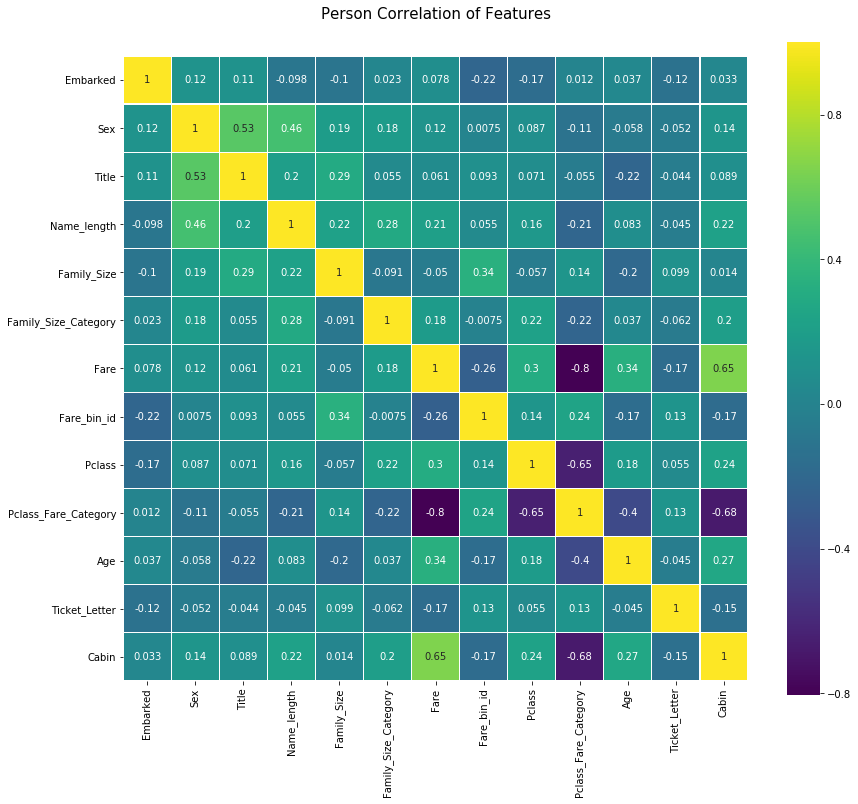

In [80]:
colormap = plt.cm.viridis
plt.figure(figsize = (14,12))
plt.title('Person Correlation of Features', y = 1.05, size = 15)
sns.heatmap(Correlation.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

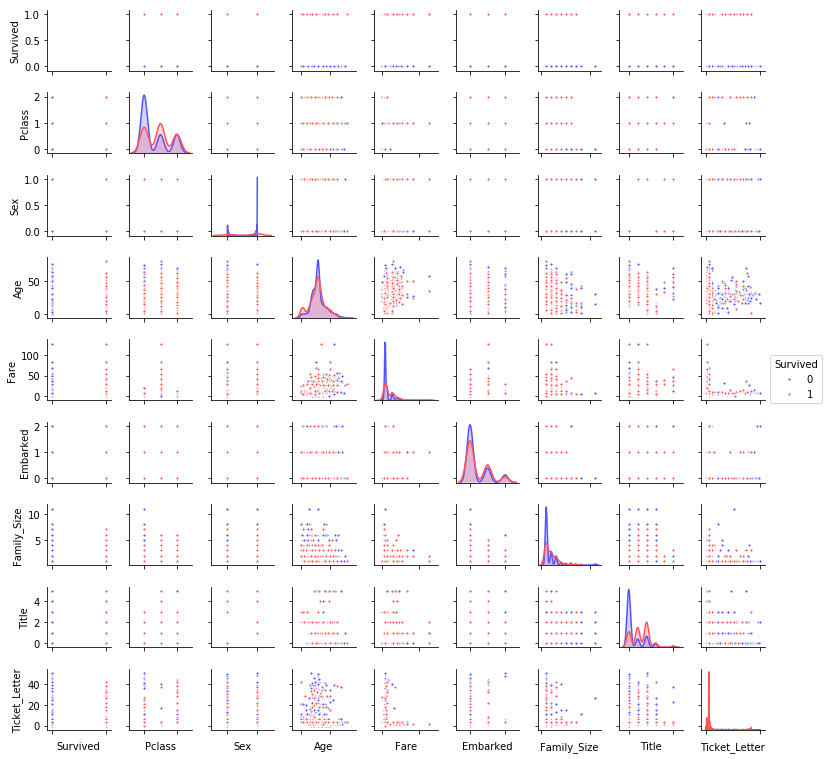

In [82]:
g = sns.pairplot(combined_train_test[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare', u'Embarked',
                                     u'Family_Size', u'Title', u'Ticket_Letter',]], hue = 'Survived', palette = 'seismic',
                 size = 1.2, diag_kind = 'kde', diag_kws = dict(shade = True), plot_kws = dict(s = 10) )
g.set(xticklabels = [])

In [83]:
# 将age 和fare 正则化
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age', 'Fare', 'Name_length']])
combined_train_test[['Age', 'Fare', 'Name_length']] = scale_age_fare.transform(combined_train_test[['Age', 'Fare', 'Name_length']])

In [85]:
combined_data_backup = combined_train_test  #备份

In [86]:
combined_train_test.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Title', 'Fare_bin_id', 'Pclass_Fare_Category',
                          'Parch', 'SibSp', 'Family_Size_Category', 'Ticket'], axis = 1, inplace = True)

In [87]:
#将训练数据和测试数据分开
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'], axis = 1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = train_data.drop(['Survived'], axis = 1)

In [88]:
titanic_train_data_X.shape

(891, 32)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):
    
    # random forest
    rf_est = RandomForestClassifier(random_state = 0)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs = 25, cv = 10, verbose = 1)
    rf_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': rf_grid.best_estimator_.feature_importances_})\
                                            .sort_values('importance',ascending = False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Features from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    #AdaBosst
    ada_est = AdaBoostClassifier(random_state = 0)
    ada_param_grid = {'n_estimators': [500],'learning_rate': [0.01, 0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs = 25, cv = 10, verbose = 1)
    ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_test_data_X),
                                          'importance': ada_grid.best_estimator_.feature_importances_})\
                                            .sort_values('')
     